In [14]:
#Import the Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [16]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [17]:
coordinates = list(lat_lngs)

In [18]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

624

In [19]:
#Create an empty list to hold the the weather data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval.       ")
print("--------------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set unbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
    #Run and API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval.       
--------------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | ferkessedougou
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | cochrane
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | isangel
Processing Record 8 of Set 1 | store heddinge
Processing Record 9 of Set 1 | cermik
Processing Record 10 of Set 1 | gweta
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | umm kaddadah
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | sovetskaya
Processing Record 22 of Set 1 | canon city
Processing Record 

Processing Record 36 of Set 4 | george town
Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | smithers
Processing Record 39 of Set 4 | fairbanks
Processing Record 40 of Set 4 | sakakah
Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | nusaybin
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | tulle
Processing Record 45 of Set 4 | irece
Processing Record 46 of Set 4 | marawi
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | floro
Processing Record 50 of Set 4 | saint-joseph
Processing Record 1 of Set 5 | pakdasht
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | jakarta
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | barcelos
Processing Record 7 of Set 5 | yaan
Processing Record 8 of Set 5 | yar-sale
Processing Record 9 of Set 5 | ambon
P

Processing Record 26 of Set 8 | tilichiki
Processing Record 27 of Set 8 | kashi
Processing Record 28 of Set 8 | leningradskiy
Processing Record 29 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 30 of Set 8 | chongwe
Processing Record 31 of Set 8 | port lincoln
Processing Record 32 of Set 8 | bambous virieux
Processing Record 33 of Set 8 | kuching
Processing Record 34 of Set 8 | carbonia
Processing Record 35 of Set 8 | madimba
Processing Record 36 of Set 8 | tkvarcheli
City not found. Skipping...
Processing Record 37 of Set 8 | gigmoto
Processing Record 38 of Set 8 | istmina
Processing Record 39 of Set 8 | andenes
Processing Record 40 of Set 8 | loandjili
Processing Record 41 of Set 8 | kropotkin
Processing Record 42 of Set 8 | baiyin
Processing Record 43 of Set 8 | yerbogachen
Processing Record 44 of Set 8 | rengasdengklok
Processing Record 45 of Set 8 | nerja
Processing Record 46 of Set 8 | kloulklubed
Processing Record 47 of Set 8 | viedma
Processing R

Processing Record 10 of Set 12 | baijiantan
Processing Record 11 of Set 12 | gashua
Processing Record 12 of Set 12 | winchester
Processing Record 13 of Set 12 | grand centre
City not found. Skipping...
Processing Record 14 of Set 12 | kelvington
Processing Record 15 of Set 12 | toliary
City not found. Skipping...
Processing Record 16 of Set 12 | puerto suarez
Processing Record 17 of Set 12 | nioki
Processing Record 18 of Set 12 | manta
Processing Record 19 of Set 12 | goryachegorsk
Processing Record 20 of Set 12 | kieta
Processing Record 21 of Set 12 | ladario
Processing Record 22 of Set 12 | winnemucca
Processing Record 23 of Set 12 | lensk
Processing Record 24 of Set 12 | saryg-sep
Processing Record 25 of Set 12 | monrovia
Processing Record 26 of Set 12 | kruisfontein
Processing Record 27 of Set 12 | atotonilco el alto
Processing Record 28 of Set 12 | san matias
Processing Record 29 of Set 12 | jalu
Processing Record 30 of Set 12 | gberia fotombu
Processing Record 31 of Set 12 | lyub

In [20]:
len(city_data)

563

In [22]:
#Convert the array of dictionaries to a Pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,80.60,74,20,18.41,EC,2021-04-19 20:46:08
1,Ferkessedougou,9.6000,-5.2000,86.61,46,100,6.42,CI,2021-04-19 20:50:06
2,Busselton,-33.6500,115.3333,53.01,98,77,7.78,AU,2021-04-19 20:50:07
3,Butaritari,3.0707,172.7902,83.23,76,94,14.00,KI,2021-04-19 20:50:07
4,Cochrane,51.1834,-114.4687,39.00,60,90,11.50,CA,2021-04-19 20:50:08
5,Mataura,-46.1927,168.8643,54.00,75,0,3.00,NZ,2021-04-19 20:46:09
6,Isangel,-19.5500,169.2667,81.81,79,46,3.49,VU,2021-04-19 20:50:08
7,Store Heddinge,55.3097,12.3889,51.01,61,0,1.14,DK,2021-04-19 20:50:09
8,Cermik,38.1361,39.4493,60.80,72,75,4.61,TR,2021-04-19 20:50:09
9,Gweta,-20.1833,25.2333,65.91,28,0,7.78,BW,2021-04-19 20:50:09


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-04-19 20:46:08,-0.7393,-90.3518,80.60,74,20,18.41
1,Ferkessedougou,CI,2021-04-19 20:50:06,9.6000,-5.2000,86.61,46,100,6.42
2,Busselton,AU,2021-04-19 20:50:07,-33.6500,115.3333,53.01,98,77,7.78
3,Butaritari,KI,2021-04-19 20:50:07,3.0707,172.7902,83.23,76,94,14.00
4,Cochrane,CA,2021-04-19 20:50:08,51.1834,-114.4687,39.00,60,90,11.50


In [24]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the dataframe to a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

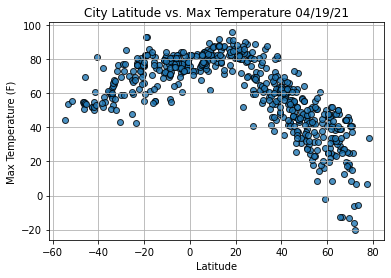

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

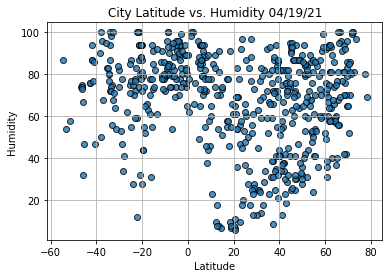

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

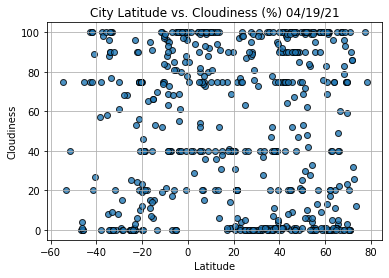

In [32]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind ss.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()